In [11]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('tas_timeseries_annual_cru_1901-2020_IND.csv')
df.head()

,Year,India,Andaman and Nicobar,Andhra Pradesh,Assam,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,...,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Daman and Diu,Jharkhand,Madhya Pradesh,Puducherry,Uttar Pradesh,Uttarakhand
0,1901,24.26,27.81,27.04,22.77,25.27,26.26,26.66,25.09,9.80,...,25.03,23.56,25.40,25.87,26.08,24.59,25.40,27.78,25.47,13.88
1,1902,24.52,27.84,27.36,22.50,25.52,26.64,27.19,25.34,10.01,...,25.07,23.81,25.72,26.48,26.67,24.66,25.82,27.81,25.67,14.11
2,1903,23.96,27.63,26.77,22.73,24.90,25.96,26.20,24.68,9.40,...,24.91,23.19,25.18,25.52,25.68,24.45,25.03,27.58,25.16,13.58
3,1904,24.02,27.29,26.83,22.51,24.95,26.07,26.59,24.77,9.57,...,24.70,23.28,25.15,25.86,26.07,24.28,25.13,27.37,25.11,13.59
4,1905,23.87,27.80,26.96,22.11,24.65,26.13,26.25,24.43,9.03,...,24.41,22.81,25.10,25.62,25.72,24.06,25.02,27.72,24.90,13.22


In [19]:
#df['Year']=pd.to_datetime(df['Date'])
df.dropna()
#df=df.drop('Time',axis=1)

,Year,India,Andaman and Nicobar,Andhra Pradesh,Assam,Delhi,Goa,Gujarat,Haryana,Himachal Pradesh,...,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Daman and Diu,Jharkhand,Madhya Pradesh,Puducherry,Uttar Pradesh,Uttarakhand
0,1901,24.26,27.81,27.04,22.77,25.27,26.26,26.66,25.09,9.80,...,25.03,23.56,25.40,25.87,26.08,24.59,25.40,27.78,25.47,13.88
1,1902,24.52,27.84,27.36,22.50,25.52,26.64,27.19,25.34,10.01,...,25.07,23.81,25.72,26.48,26.67,24.66,25.82,27.81,25.67,14.11
2,1903,23.96,27.63,26.77,22.73,24.90,25.96,26.20,24.68,9.40,...,24.91,23.19,25.18,25.52,25.68,24.45,25.03,27.58,25.16,13.58
3,1904,24.02,27.29,26.83,22.51,24.95,26.07,26.59,24.77,9.57,...,24.70,23.28,25.15,25.86,26.07,24.28,25.13,27.37,25.11,13.59
4,1905,23.87,27.80,26.96,22.11,24.65,26.13,26.25,24.43,9.03,...,24.41,22.81,25.10,25.62,25.72,24.06,25.02,27.72,24.90,13.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2016,25.27,27.69,28.23,23.58,26.45,27.25,27.61,26.17,11.18,...,25.81,24.83,26.46,26.85,27.03,25.31,26.29,29.00,26.56,15.26
116,2017,25.15,27.58,28.29,23.57,26.07,27.39,27.56,25.84,10.78,...,25.57,24.45,26.40,26.89,27.04,25.08,26.17,28.87,26.26,14.87
117,2018,25.00,27.32,28.03,23.21,26.03,27.27,27.74,25.84,10.74,...,25.20,24.42,26.07,26.97,27.19,24.65,26.04,28.72,26.12,14.81
118,2019,24.94,27.76,28.37,23.44,25.28,27.39,27.41,25.06,9.95,...,25.37,23.56,26.29,26.79,26.96,24.96,25.94,29.08,25.74,14.05


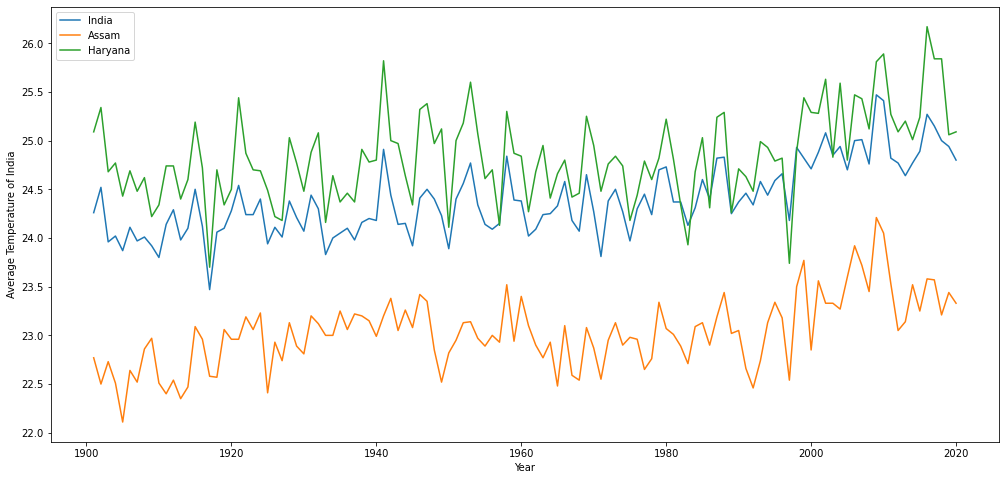

In [37]:
plt.figure(figsize=(17,8))
plt.plot(df['Year'],df['India'],label='India')
plt.plot(df['Year'],df['Assam'],label='Assam')
plt.plot(df['Year'],df['Haryana'],label='Haryana')
plt.xlabel('Year')
plt.ylabel('Average Temperature of India')
plt.legend()
plt.show()

In [ ]:
!pip install fbprophet
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

     |████████████████████████████████| 64 kB 2.3 MB/s  eta 0:00:01
     |████████████████████████████████| 67.3 MB 42 kB/s s eta 0:00:01 MB 69.3 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 4.6 MB/s  eta 0:00:01
     |████████████████████████████████| 155 kB 49.6 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 5.0 MB/s  eta 0:00:01
     |████████████████████████████████| 5.4 MB 40.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 53.0 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /srv/conda/envs/notebook/bin/python3.6 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-t90sk2gz/fbprophet_7d537bf82fd44c1bb7075fb8bd314bad/setup.py'"'"'; __file__='"'"'/tmp/pip-install-t90sk2gz/fbprophet_7d537bf82fd44c1bb7075fb8bd314bad/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"

In [32]:
df.columns=['y','ds']
df.head()

,y,ds
0,6,2010-12-01
1,12,2010-12-02
2,48,2010-12-03
3,8,2010-12-05
4,6,2010-12-06


In [79]:
prediction_size=int(0.1*len(df))
train_df=df[:-prediction_size]
print(prediction_size)

30


In [80]:
m = Prophet()
m.fit(train_df)
future= m.make_future_dataframe(periods=prediction_size)
forecast=m.predict(future)
forecast.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-01,19.889329,-79.463875,107.006292,19.889329,19.889329,-8.195652,-8.195652,-8.195652,-8.195652,-8.195652,-8.195652,0.0,0.0,0.0,11.693676
1,2010-12-02,19.887454,-82.999859,108.705877,19.887454,19.887454,-5.165161,-5.165161,-5.165161,-5.165161,-5.165161,-5.165161,0.0,0.0,0.0,14.722293
2,2010-12-03,19.885579,-56.025833,129.033139,19.885579,19.885579,15.784535,15.784535,15.784535,15.784535,15.784535,15.784535,0.0,0.0,0.0,35.670115
3,2010-12-05,19.881830,-71.204875,119.289679,19.881830,19.881830,0.782389,0.782389,0.782389,0.782389,0.782389,0.782389,0.0,0.0,0.0,20.664219
4,2010-12-06,19.879955,-60.986093,128.823756,19.879955,19.879955,13.307755,13.307755,13.307755,13.307755,13.307755,13.307755,0.0,0.0,0.0,33.187710


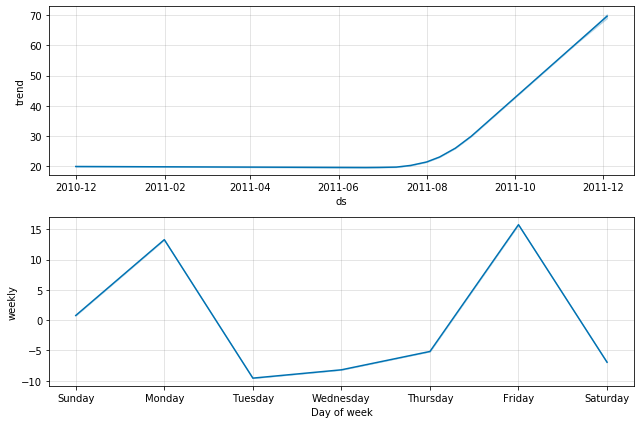

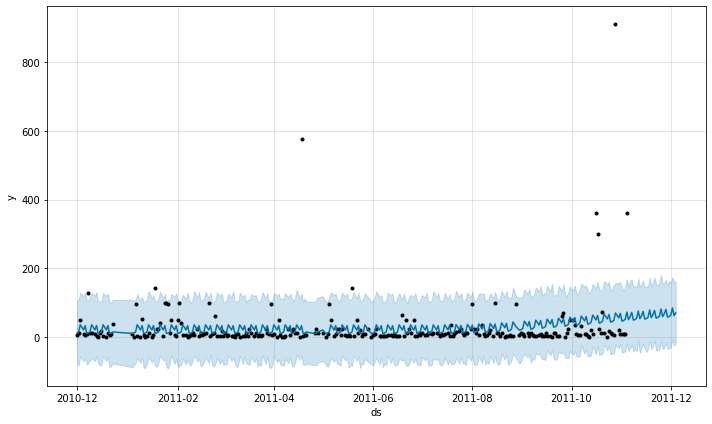

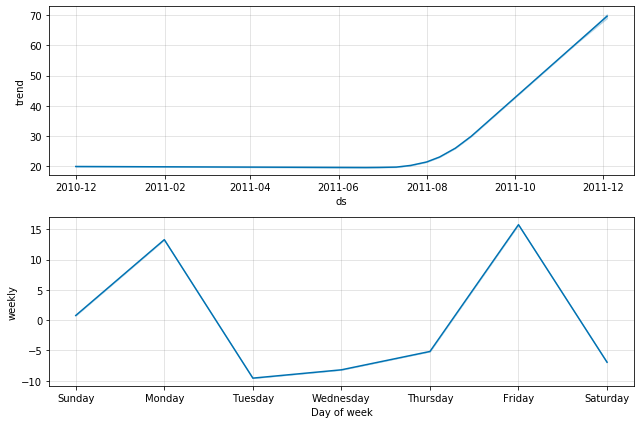

In [82]:
m.plot(forecast)
m.plot_components(forecast)

In [81]:
#from sklearn.metrics import mean_squared_error
#error = mean_squared_error(df, forecast)
#print('Test MSE: %.3f' % error)
se = np.square(forecast.loc[:, 'yhat'] - df['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
print(mse,rmse)


6139.8909136491975 78.35745601823223
